# Lab 14 - Data Visualization demo # 1

Thomas Sherer, 2020-07-16

## SETUP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Description of dataset

Netflix Movies and TV Shows (file: https://www.kaggle.com/shivamb/netflix-shows - netflix_titles.csv (2.3 MB)):

"Description
TV Shows and Movies listed on Netflix
This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled."


In [2]:
nf_df = pd.read_csv("./data/netflix_titles.csv")
nf_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


## Visualization using Matplotlib:

### Cleaning up the "date_added" values in the dataset:

In [3]:
nf_df = nf_df.dropna(subset=['date_added'])

def year_added(date):
    return int(date[-4:])

nf_df['date_added'] = nf_df['date_added'].apply(year_added)
nf_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


#### Parsing the movie data from the dataset:

In [4]:
movies_only = nf_df[nf_df['type'] == "Movie"]
movies_only.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


#### Parsing the TV show data from the dataset:

In [5]:
tv_only = nf_df[nf_df['type'] == "TV Show"]
tv_only.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,2017,2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,2017,2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,NaN,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",NaN,2018,2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...


#### Pulling movie counts-by-year from the subset:

In [6]:
movies_by_year_df = movies_only.groupby(['date_added'])
movies_by_year_df = movies_by_year_df.count()
movies_by_year = dict(movies_by_year_df['show_id'])
movies_by_year

{2008: 1,
 2009: 2,
 2010: 1,
 2011: 13,
 2012: 4,
 2013: 6,
 2014: 19,
 2015: 58,
 2016: 264,
 2017: 913,
 2018: 1290,
 2019: 1546,
 2020: 147}

#### Pulling TV show counts-by-year from the subset:

In [7]:
tv_by_year_df = tv_only.groupby(['date_added'])
tv_by_year_df = tv_by_year_df.count()
tv_by_year = dict(tv_by_year_df['show_id'])
tv_by_year

{2008: 1,
 2012: 3,
 2013: 6,
 2014: 6,
 2015: 32,
 2016: 192,
 2017: 387,
 2018: 492,
 2019: 803,
 2020: 37}

#### Matplotlib pyplot of the Movie and TV Show data results:

[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]


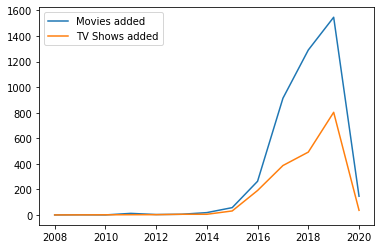

([<matplotlib.lines.Line2D at 0x7ff5b27709d0>],
 [<matplotlib.lines.Line2D at 0x7ff5b2770d30>])

In [8]:
# Plot X as years, y as show_count,
years = nf_df['date_added']
years = years.unique()
years.sort()


def netflix_plot():
    plt.figure()
    mv_y = plt.plot(*zip(*sorted(movies_by_year.items())), label="Movies added")
    tv_y = plt.plot(*zip(*sorted(tv_by_year.items())), label="TV Shows added")
    plt.legend()
    plt.show()
    return mv_y, tv_y

print(years)
netflix_plot()

### Display improvements using Seaborn

#### Setting control of Matplotlib results to Seaborn:

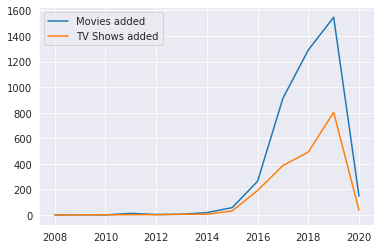

([<matplotlib.lines.Line2D at 0x7ff5b27bf280>],
 [<matplotlib.lines.Line2D at 0x7ff5b20712e0>])

In [9]:
sns.set_style("darkgrid")
netflix_plot()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


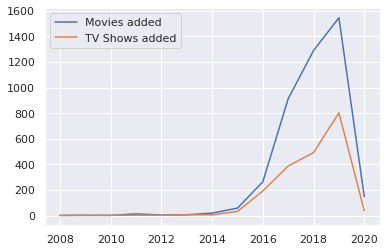

([<matplotlib.lines.Line2D at 0x7ff5b2007700>],
 [<matplotlib.lines.Line2D at 0x7ff5b2007a60>])

In [10]:
sns.set(font='Arial')
netflix_plot()

In [11]:
# movies_by_year_df
# # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html#pandas.concat
# combine_dfs = pd.concat([movies_by_year_df, tv_by_year_df], axis='1')
# # mv_y, tv_y = netflix_plot()
# # sns.barplot(x=years, y=movies_by_year_df['show_id'], hue=nf_df['date_added'], data=movies_by_year_df)
# # sns.barplot(x=years, y=combine_dfs, hue=nf_df['type'], data=nf_df)
# combine_dfs